In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import os
import nltk
from nltk.tokenize import WordPunctTokenizer
from nltk.stem import *
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import numpy as np
from collections import Counter
import seaborn as sns
import string
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
import gensim
import math
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [2]:
df_all = pd.read_csv('/Users/natalipeeva/Documents/GitHub/Automatic-Answering-of-City-Council-Questions/data/generation_results/tfidf_results_min50_max400_len - tfidf_results_min50_max400_len.csv')

In [3]:
df_all.head()

,Unnamed: 0,input,generated_answer,target_answer
0,0,\n7.\nKan het college de reeds bestaande zwemp...,[{'generated_text': 'Het college heeft de reed...,\nVoor het vinden van de officiële zwemplekken...
1,1,\n \n3. Huisartsen geven aan meer informatie n...,[{'generated_text': 'Het college heeft zich be...,"\nDe uitvoerder van de regeling, het CAK, lij..."
2,2,\n \n8. Weten ongedocumenteerden de weg naar m...,[{'generated_text': 'Het college heeft zich ve...,"\nDe Kruispost wordt goed bezocht, maar het c..."
3,3,\n \n4. Is het college tot nu toe tevreden met...,[{'generated_text': 'Het college heeft zich ni...,"\nJa, met de beschikbare middelen is de uitvo..."
4,4,\n \n1. \nKan aan de werkinstructie worden toe...,[{'generated_text': 'Het college heeft zich ni...,...


### Question types
- **Factual**
- with links 
- without links


- **Opinion-seeking**
- with links 
- without links

#### Ideas:
- Unsupervised Learning, where first some words are provided - relevant to each class
https://towardsdatascience.com/unsupervised-text-classification-with-lbl2vec-6c5e040354de ;
https://github.com/sebischair/Lbl2Vec

**Frequent structures within factual questions**

In [4]:
import nltk

In [5]:
import nltk

sentence = "The quick brown fox jumps over the lazy dog. The lazy dog is not impressed."

def detect_ngarms_beginning(sentence, n):
    tokens = nltk.word_tokenize(str(sentence))

    #n = 3 # trigrams
    ngrams = list(nltk.ngrams(tokens, n))

    beginning_ngrams = []
    for gram in ngrams:
        if gram[0][0].isupper():
            beginning_ngrams.append(gram)
    #single_list = [item for sublist in beginning_ngrams for item in sublist]
    #freq_dist = nltk.FreqDist(beginning_ngrams)
    #top_ngrams = freq_dist.most_common(5)

    return beginning_ngrams


In [6]:
detect_ngarms_beginning(sentence,3)

[('The', 'quick', 'brown'), ('The', 'lazy', 'dog')]

In [7]:
questions = df_all['input']

In [8]:
answers = df_all['generated_answer']

In [9]:
q_ngrams = []
q_3grams = []
for q in questions: 
    q_ngrams.append(detect_ngarms_beginning(q, 3))
    q_3grams.append(detect_ngarms_beginning(q, 3))

In [10]:
q_4grams = []
for q in questions: 
    q_ngrams.append(detect_ngarms_beginning(q, 4))
    q_4grams.append(detect_ngarms_beginning(q, 4))

In [11]:
q_5grams = []
for q in questions: 
    q_ngrams.append(detect_ngarms_beginning(q, 5))
    q_5grams.append(detect_ngarms_beginning(q, 5))

In [12]:
q_6grams = []
for q in questions: 
    q_ngrams.append(detect_ngarms_beginning(q, 6))
    q_6grams.append(detect_ngarms_beginning(q, 6))

In [13]:
q_7grams = []
for q in questions: 
    q_ngrams.append(detect_ngarms_beginning(q, 7))
    q_7grams.append(detect_ngarms_beginning(q, 7))

### All ngrams - Questions

In [14]:
single_list = [item for sublist in q_ngrams for item in sublist]
freq_dist = nltk.FreqDist(single_list)
top_ngrams = freq_dist.most_common(45)
top_ngrams

[(('B', 'en', 'W'), 148),
 (('Deel', 'deze', 'pagina'), 140),
 (('Mijn', 'Amsterdam', 'English'), 131),
 (('Amsterdam', 'English', 'site'), 131),
 (('English', 'site', 'Menuzoeken'), 131),
 (('Menuzoeken', 'Onderwerpen', 'Nieuws'), 131),
 (('Onderwerpen', 'Nieuws', 'Contact'), 131),
 (('Nieuws', 'Contact', 'Zoeken'), 131),
 (('Contact', 'Zoeken', 'in'), 131),
 (('Zoeken', 'in', 'Amsterdam.nl'), 131),
 (('Amsterdam.nl', 'Zoek', 'Zoek'), 131),
 (('Pad', 'tot', 'huidige'), 131),
 (('Mijn', 'Amsterdam', 'English', 'site'), 131),
 (('Amsterdam', 'English', 'site', 'Menuzoeken'), 131),
 (('English', 'site', 'Menuzoeken', 'Onderwerpen'), 131),
 (('Menuzoeken', 'Onderwerpen', 'Nieuws', 'Contact'), 131),
 (('Onderwerpen', 'Nieuws', 'Contact', 'Zoeken'), 131),
 (('Nieuws', 'Contact', 'Zoeken', 'in'), 131),
 (('Contact', 'Zoeken', 'in', 'Amsterdam.nl'), 131),
 (('Zoeken', 'in', 'Amsterdam.nl', 'Zoek'), 131),
 (('Pad', 'tot', 'huidige', 'pagina'), 131),
 (('Mijn', 'Amsterdam', 'English', 'site', '

#### 3-grams:

In [15]:
single_list = [item for sublist in q_3grams for item in sublist]
freq_dist = nltk.FreqDist(single_list)
freq_dist.most_common(20)

[(('B', 'en', 'W'), 148),
 (('Deel', 'deze', 'pagina'), 140),
 (('Mijn', 'Amsterdam', 'English'), 131),
 (('Amsterdam', 'English', 'site'), 131),
 (('English', 'site', 'Menuzoeken'), 131),
 (('Menuzoeken', 'Onderwerpen', 'Nieuws'), 131),
 (('Onderwerpen', 'Nieuws', 'Contact'), 131),
 (('Nieuws', 'Contact', 'Zoeken'), 131),
 (('Contact', 'Zoeken', 'in'), 131),
 (('Zoeken', 'in', 'Amsterdam.nl'), 131),
 (('Amsterdam.nl', 'Zoek', 'Zoek'), 131),
 (('Pad', 'tot', 'huidige'), 131),
 (('Gemeente', 'Amsterdam', 'Direct'), 129),
 (('Amsterdam', 'Direct', 'naar'), 129),
 (('Direct', 'naar', 'inhoud'), 129),
 (('Zoek', 'Zoek', 'Verbergen'), 129),
 (('Zoek', 'Verbergen', 'Deze'), 129),
 (('Verbergen', 'Deze', 'browser'), 129),
 (('Deze', 'browser', 'wordt'), 129),
 (('Gebruik', 'een', 'recente'), 129)]

#### 4-grams:

In [16]:
single_list = [item for sublist in q_4grams for item in sublist]
freq_dist = nltk.FreqDist(single_list)
freq_dist.most_common(20)

[(('Mijn', 'Amsterdam', 'English', 'site'), 131),
 (('Amsterdam', 'English', 'site', 'Menuzoeken'), 131),
 (('English', 'site', 'Menuzoeken', 'Onderwerpen'), 131),
 (('Menuzoeken', 'Onderwerpen', 'Nieuws', 'Contact'), 131),
 (('Onderwerpen', 'Nieuws', 'Contact', 'Zoeken'), 131),
 (('Nieuws', 'Contact', 'Zoeken', 'in'), 131),
 (('Contact', 'Zoeken', 'in', 'Amsterdam.nl'), 131),
 (('Zoeken', 'in', 'Amsterdam.nl', 'Zoek'), 131),
 (('Pad', 'tot', 'huidige', 'pagina'), 131),
 (('Gemeente', 'Amsterdam', 'Direct', 'naar'), 129),
 (('Amsterdam', 'Direct', 'naar', 'inhoud'), 129),
 (('Direct', 'naar', 'inhoud', 'GemeenteAmsterdam'), 129),
 (('Amsterdam.nl', 'Zoek', 'Zoek', 'Verbergen'), 129),
 (('Zoek', 'Zoek', 'Verbergen', 'Deze'), 129),
 (('Zoek', 'Verbergen', 'Deze', 'browser'), 129),
 (('Verbergen', 'Deze', 'browser', 'wordt'), 129),
 (('Deze', 'browser', 'wordt', 'niet'), 129),
 (('Gebruik', 'een', 'recente', 'versie'), 129),
 (('Edge', ',', 'Chrome', 'of'), 129),
 (('Chrome', 'of', 'Firef

#### 5-grams

In [17]:
single_list = [item for sublist in q_5grams for item in sublist]
freq_dist = nltk.FreqDist(single_list)
freq_dist.most_common(20)

[(('Mijn', 'Amsterdam', 'English', 'site', 'Menuzoeken'), 131),
 (('Amsterdam', 'English', 'site', 'Menuzoeken', 'Onderwerpen'), 131),
 (('English', 'site', 'Menuzoeken', 'Onderwerpen', 'Nieuws'), 131),
 (('Menuzoeken', 'Onderwerpen', 'Nieuws', 'Contact', 'Zoeken'), 131),
 (('Onderwerpen', 'Nieuws', 'Contact', 'Zoeken', 'in'), 131),
 (('Nieuws', 'Contact', 'Zoeken', 'in', 'Amsterdam.nl'), 131),
 (('Contact', 'Zoeken', 'in', 'Amsterdam.nl', 'Zoek'), 131),
 (('Zoeken', 'in', 'Amsterdam.nl', 'Zoek', 'Zoek'), 131),
 (('Pad', 'tot', 'huidige', 'pagina', 'Home'), 131),
 (('Gemeente', 'Amsterdam', 'Direct', 'naar', 'inhoud'), 129),
 (('Amsterdam', 'Direct', 'naar', 'inhoud', 'GemeenteAmsterdam'), 129),
 (('Amsterdam.nl', 'Zoek', 'Zoek', 'Verbergen', 'Deze'), 129),
 (('Zoek', 'Zoek', 'Verbergen', 'Deze', 'browser'), 129),
 (('Zoek', 'Verbergen', 'Deze', 'browser', 'wordt'), 129),
 (('Verbergen', 'Deze', 'browser', 'wordt', 'niet'), 129),
 (('Deze', 'browser', 'wordt', 'niet', 'meer'), 129),
 (

#### 6-grams

In [18]:
single_list = [item for sublist in q_6grams for item in sublist]
freq_dist = nltk.FreqDist(single_list)
freq_dist.most_common(20)

[(('Mijn', 'Amsterdam', 'English', 'site', 'Menuzoeken', 'Onderwerpen'), 131),
 (('Amsterdam', 'English', 'site', 'Menuzoeken', 'Onderwerpen', 'Nieuws'),
  131),
 (('English', 'site', 'Menuzoeken', 'Onderwerpen', 'Nieuws', 'Contact'), 131),
 (('Menuzoeken', 'Onderwerpen', 'Nieuws', 'Contact', 'Zoeken', 'in'), 131),
 (('Onderwerpen', 'Nieuws', 'Contact', 'Zoeken', 'in', 'Amsterdam.nl'), 131),
 (('Nieuws', 'Contact', 'Zoeken', 'in', 'Amsterdam.nl', 'Zoek'), 131),
 (('Contact', 'Zoeken', 'in', 'Amsterdam.nl', 'Zoek', 'Zoek'), 131),
 (('Gemeente', 'Amsterdam', 'Direct', 'naar', 'inhoud', 'GemeenteAmsterdam'),
  129),
 (('Zoeken', 'in', 'Amsterdam.nl', 'Zoek', 'Zoek', 'Verbergen'), 129),
 (('Amsterdam.nl', 'Zoek', 'Zoek', 'Verbergen', 'Deze', 'browser'), 129),
 (('Zoek', 'Zoek', 'Verbergen', 'Deze', 'browser', 'wordt'), 129),
 (('Zoek', 'Verbergen', 'Deze', 'browser', 'wordt', 'niet'), 129),
 (('Verbergen', 'Deze', 'browser', 'wordt', 'niet', 'meer'), 129),
 (('Deze', 'browser', 'wordt', 'n

#### 7-grams

In [19]:
single_list = [item for sublist in q_7grams for item in sublist]
freq_dist = nltk.FreqDist(single_list)
freq_dist.most_common(20)

[(('Mijn',
   'Amsterdam',
   'English',
   'site',
   'Menuzoeken',
   'Onderwerpen',
   'Nieuws'),
  131),
 (('Amsterdam',
   'English',
   'site',
   'Menuzoeken',
   'Onderwerpen',
   'Nieuws',
   'Contact'),
  131),
 (('English',
   'site',
   'Menuzoeken',
   'Onderwerpen',
   'Nieuws',
   'Contact',
   'Zoeken'),
  131),
 (('Menuzoeken',
   'Onderwerpen',
   'Nieuws',
   'Contact',
   'Zoeken',
   'in',
   'Amsterdam.nl'),
  131),
 (('Onderwerpen', 'Nieuws', 'Contact', 'Zoeken', 'in', 'Amsterdam.nl', 'Zoek'),
  131),
 (('Nieuws', 'Contact', 'Zoeken', 'in', 'Amsterdam.nl', 'Zoek', 'Zoek'), 131),
 (('Contact', 'Zoeken', 'in', 'Amsterdam.nl', 'Zoek', 'Zoek', 'Verbergen'),
  129),
 (('Zoeken', 'in', 'Amsterdam.nl', 'Zoek', 'Zoek', 'Verbergen', 'Deze'), 129),
 (('Amsterdam.nl', 'Zoek', 'Zoek', 'Verbergen', 'Deze', 'browser', 'wordt'),
  129),
 (('Zoek', 'Zoek', 'Verbergen', 'Deze', 'browser', 'wordt', 'niet'), 129),
 (('Zoek', 'Verbergen', 'Deze', 'browser', 'wordt', 'niet', 'meer'),

### All ngrams - Answers

In [20]:
%cd '/Users/natalipeeva/Documents/GitHub/Automatic-Answering-of-City-Council-Questions/'
from src_clean.preprocessing.text_preprocessing import preprocess_text

/Users/natalipeeva/Documents/GitHub/Automatic-Answering-of-City-Council-Questions


In [21]:
answers = df_all['generated_answer']

In [31]:
a_ngrams = []
a_3grams = []
a_4grams = []
a_5grams = []
a_6grams = []
a_7grams = []

for a in answers: 
    a_ngrams.append(detect_ngarms_beginning(str(a), 3))
    a_ngrams.append(detect_ngarms_beginning(str(a), 4))
    a_ngrams.append(detect_ngarms_beginning(str(a), 5))
    a_ngrams.append(detect_ngarms_beginning(str(a), 6))
    a_ngrams.append(detect_ngarms_beginning(str(a), 7))
    
    a_3grams.append(detect_ngarms_beginning(str(a), 3))
    a_4grams.append(detect_ngarms_beginning(str(a), 4))
    a_5grams.append(detect_ngarms_beginning(str(a), 5))
    a_6grams.append(detect_ngarms_beginning(str(a), 6))
    a_7grams.append(detect_ngarms_beginning(str(a), 7))
    

In [32]:
single_list = [item for sublist in a_ngrams for item in sublist]
freq_dist = nltk.FreqDist(single_list)
top_ngrams = freq_dist.most_common(45)
top_ngrams

[(('Er', 'is', 'geen'), 35),
 (('Er', 'is', 'geen', 'sprake'), 31),
 (('Er', 'is', 'geen', 'sprake', 'van'), 31),
 (('Het', 'gaat', 'om'), 25),
 (('Op', 'dit', 'moment'), 22),
 (('Op', 'dit', 'moment', 'is'), 22),
 (('Ook', 'is', 'dit'), 21),
 (('Daarnaast', 'is', 'het'), 20),
 (('Ook', 'is', 'dit', 'niet'), 19),
 (('Dit', 'gebeurt', 'in'), 19),
 (('Hierbij', 'is', 'een'), 15),
 (('Het', 'gaat', 'om', 'de'), 15),
 (('In', 'de', 'periode'), 15),
 (('In', 'de', 'periode', 'van'), 15),
 (('Op', 'basis', 'van'), 14),
 (('Op', 'dit', 'moment', 'is', 'er'), 13),
 (('Deze', 'maatregelen', 'zijn'), 10),
 (('Daarnaast', 'is', 'er'), 10),
 (('Daarnaast', 'is', 'de'), 10),
 (('In', 'de', 'praktijk'), 9),
 (('Deze', 'maatregelen', 'zijn', 'gericht'), 9),
 (('In', 'de', 'praktijk', 'is'), 9),
 (('Deze', 'maatregelen', 'zijn', 'gericht', 'op'), 9),
 (('Er', 'is', 'geen', 'sprake', 'van', 'geen'), 9),
 (('Er', 'is', 'geen', 'sprake', 'van', 'aanleiding'), 9),
 (('Op', 'dit', 'moment', 'is', 'er', 'ge

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/natalipeeva/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/natalipeeva/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


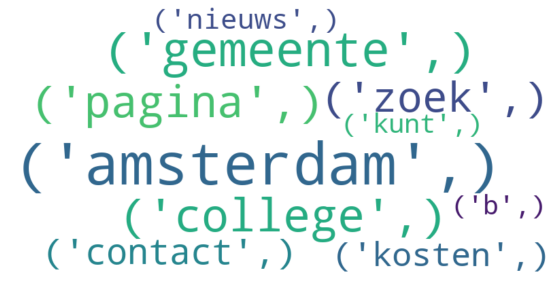

In [35]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud


nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('dutch'))

preprocessed_texts = []
for text in questions:
    text = text.lower()  # Convert to lowercase
    tokens = word_tokenize(text)  # Tokenization
    tokens = [token for token in tokens if token.isalpha()]  # Remove non-alphabetic characters
    tokens = [token for token in tokens if token not in stop_words]  # Remove stopwords
    preprocessed_texts.extend(tokens)

# Counting
ngram_counts = Counter(ngrams(preprocessed_texts, n=1))  # Change n to desired n-gram length
most_common_ngrams = ngram_counts.most_common(10)  # Get the top 10 most common n-grams

# Convert tuples to strings
most_common_ngrams = [(str(ngram), count) for ngram, count in most_common_ngrams]

# Create word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(most_common_ngrams))

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


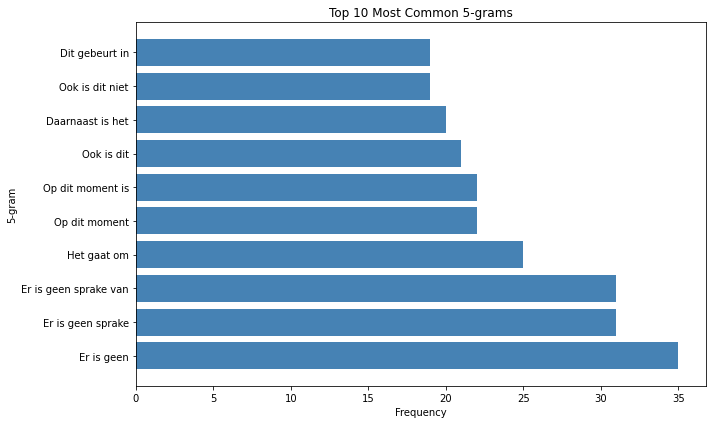

In [36]:
import matplotlib.pyplot as plt

# Extract the 5-grams and their frequencies
top_10 = freq_dist.most_common(10)
ngrams = [ngram for ngram, count in top_10]
frequencies = [count for ngram, count in top_10]

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.barh(range(len(ngrams)), frequencies, color='steelblue')
plt.yticks(range(len(ngrams)), [' '.join(ngram) for ngram in ngrams], fontsize=10)
plt.xlabel('Frequency')
plt.ylabel('5-gram')
plt.title('Top 10 Most Common 5-grams')
plt.tight_layout()
plt.show()


#### 3-grams

In [37]:
single_list = [item for sublist in a_3grams for item in sublist]
freq_dist = nltk.FreqDist(single_list)
freq_dist.most_common(10)

[(('Er', 'is', 'geen'), 35),
 (('Het', 'gaat', 'om'), 25),
 (('Op', 'dit', 'moment'), 22),
 (('Ook', 'is', 'dit'), 21),
 (('Daarnaast', 'is', 'het'), 20),
 (('Dit', 'gebeurt', 'in'), 19),
 (('Hierbij', 'is', 'een'), 15),
 (('In', 'de', 'periode'), 15),
 (('Op', 'basis', 'van'), 14),
 (('Deze', 'maatregelen', 'zijn'), 10)]

In [39]:
len(answers)

52

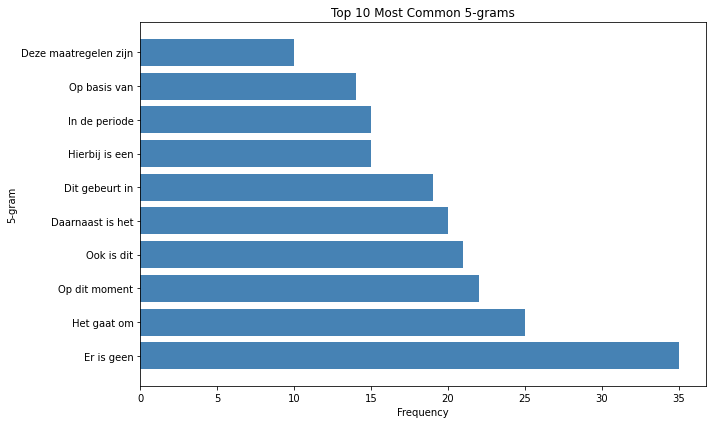

In [38]:
import matplotlib.pyplot as plt

# Extract the 5-grams and their frequencies
top_10 = freq_dist.most_common(10)
ngrams = [ngram for ngram, count in top_10]
frequencies = [count for ngram, count in top_10]

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.barh(range(len(ngrams)), frequencies, color='steelblue')
plt.yticks(range(len(ngrams)), [' '.join(ngram) for ngram in ngrams], fontsize=10)
plt.xlabel('Frequency')
plt.ylabel('5-gram')
plt.title('Top 10 Most Common 5-grams')
plt.tight_layout()
plt.show()


#### 4-grams

In [27]:
single_list = [item for sublist in a_4grams for item in sublist]
freq_dist = nltk.FreqDist(single_list)
freq_dist.most_common(10)

[]

#### 5-grams

In [28]:
single_list = [item for sublist in a_5grams for item in sublist]
freq_dist = nltk.FreqDist(single_list)
freq_dist.most_common(10)

[]

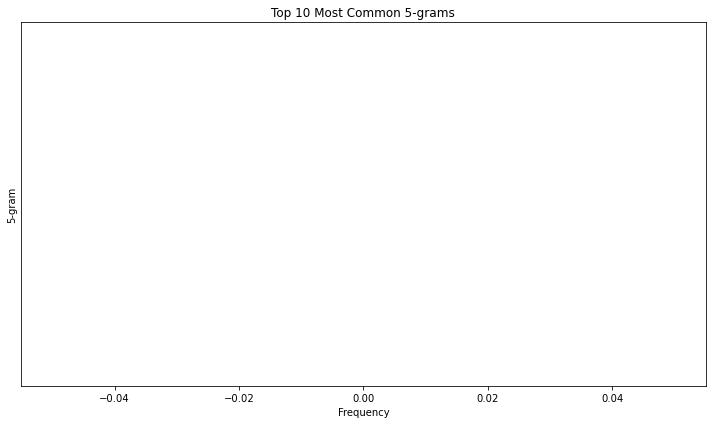

In [29]:
import matplotlib.pyplot as plt

# Extract the 5-grams and their frequencies
top_10 = freq_dist.most_common(10)
ngrams = [ngram for ngram, count in top_10]
frequencies = [count for ngram, count in top_10]

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.barh(range(len(ngrams)), frequencies, color='steelblue')
plt.yticks(range(len(ngrams)), [' '.join(ngram) for ngram in ngrams], fontsize=10)
plt.xlabel('Frequency')
plt.ylabel('5-gram')
plt.title('Top 10 Most Common 5-grams')
plt.tight_layout()
plt.show()


In [30]:
from wordcloud import WordCloud

# Create a string representation of the 5-grams and their frequencies
text = ' '.join([' '.join(ngram) * count for ngram, count in top_10])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Top 10 Most Common 5-grams')
plt.tight_layout()
plt.show()


ValueError: We need at least 1 word to plot a word cloud, got 0.

#### 6-grams

In [ ]:
single_list = [item for sublist in a_6grams for item in sublist]
freq_dist = nltk.FreqDist(single_list)
freq_dist.most_common(10)

[(('Er', 'is', 'geen', 'sprake', 'van', 'geen'), 9),
 (('Er', 'is', 'geen', 'sprake', 'van', 'aanleiding'), 9),
 (('Op', 'dit', 'moment', 'is', 'er', 'geen'), 9),
 (('Dit', 'gebeurt', 'in', 'de', 'periode', 'van'), 5),
 (('De', 'maatregelen', 'zijn', 'gericht', 'op', 'het'), 5),
 (('Deze', 'maatregelen', 'zijn', 'gericht', 'op', 'het'), 5),
 (('Deze', 'maatregelen', 'zijn', 'gericht', 'op', 'de'), 4),
 (('In', 'de', 'periode', 'van', '2019', 'is'), 4),
 (('Op', 'dit', 'moment', 'is', 'er', 'een'), 4),
 (('Op', 'dit', 'moment', 'is', 'de', 'uitwerking'), 4)]

#### 7-grams

In [ ]:
single_list = [item for sublist in a_7grams for item in sublist]
freq_dist = nltk.FreqDist(single_list)
freq_dist.most_common(10)

[(('Er', 'is', 'geen', 'sprake', 'van', 'aanleiding', 'van'), 9),
 (('Op', 'dit', 'moment', 'is', 'er', 'geen', 'aandacht'), 5),
 (('Op', 'dit', 'moment', 'is', 'de', 'uitwerking', 'van'), 4),
 (('Amsterdam', '.', 'Op', 'dit', 'moment', 'is', 'er'), 3),
 (('In', 'de', 'periode', 'van', 'oktober', '2015', 'is'), 3),
 (('Er', 'is', 'geen', 'sprake', 'van', 'geen', 'aanpassingen'), 3),
 (('Er', 'is', 'geen', 'sprake', 'van', 'aanpassing', 'van'), 3),
 (('Het', 'College', 'haalde', 'de', 'informatie', 'van', 'een'), 2),
 (('Amsterdam', 'moeten', 'worden', 'geïnformeerd', '.', 'Bij', 'de'), 2),
 (('Amsterdam', '.', 'Ook', 'is', 'dit', 'niet', 'in'), 2)]

### URL Q&A

In [ ]:
df_trans_links = pd.read_csv('Questions_links_translations.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'Questions_links_translations.csv'

In [ ]:
questions = df_trans_links['Question']
answers = df_trans_links['Answer']

In [ ]:
q_ngrams_ = []
q_3grams_ = []
q_4grams_ = []
q_5grams_ = []
q_6grams_ = []
q_7grams_ = []

for q in questions: 
    q_ngrams_.append(detect_ngarms_beginning(str(q), 3))
    q_ngrams_.append(detect_ngarms_beginning(str(q), 4))
    q_ngrams_.append(detect_ngarms_beginning(str(q), 5))
    q_ngrams_.append(detect_ngarms_beginning(str(q), 6))
    q_ngrams_.append(detect_ngarms_beginning(str(q), 7))
    
    q_3grams_.append(detect_ngarms_beginning(str(q), 3))
    q_4grams_.append(detect_ngarms_beginning(str(q), 4))
    q_5grams_.append(detect_ngarms_beginning(str(q), 5))
    q_6grams_.append(detect_ngarms_beginning(str(q), 6))
    q_7grams_.append(detect_ngarms_beginning(str(q), 7))
    

In [ ]:
single_list = [item for sublist in q_ngrams_ for item in sublist]
freq_dist = nltk.FreqDist(single_list)
top_ngrams = freq_dist.most_common(45)
top_ngrams

In [ ]:
single_list = [item for sublist in q_4grams_ for item in sublist]
freq_dist = nltk.FreqDist(single_list)
top_ngrams = freq_dist.most_common(15)
top_ngrams

In [ ]:
single_list = [item for sublist in q_5grams_ for item in sublist]
freq_dist = nltk.FreqDist(single_list)
top_ngrams = freq_dist.most_common(15)
top_ngrams